In [86]:
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Lasso
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
%matplotlib inline
import matplotlib.pyplot as plt 
import matplotlib
import warnings
#matplotlib.rcParams["figure.figsize"] = (20,10)

In [87]:
df=pd.read_csv('bengaluru_house_prices.csv')

In [88]:
df.head()

,Unnamed: 0,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [89]:
df.shape

(13320, 10)

In [90]:
#study all fearure and drop unwanted features

In [91]:
df2= df.drop(['area_type','availability','society','balcony'],axis='columns')

In [92]:
df2

,Unnamed: 0,location,size,total_sqft,bath,price
0,0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,2,Uttarahalli,3 BHK,1440,2.0,62.00
3,3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...,...
13315,13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,13316,Richards Town,4 BHK,3600,5.0,400.00
13317,13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


# Data Cleaning: Handle NA values

In [93]:
df2.isnull().sum()

Unnamed: 0     0
location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [94]:
df3=df2.dropna()

In [95]:
df3.isnull().sum()

Unnamed: 0    0
location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [96]:
#in my owen project i will study duplication and remove it here
df3.duplicated().sum()

0

In [97]:
df3.shape

(13246, 6)

# Feature Engineering
#Add new feature(integer) for bhk (Bedrooms Hall Kitchen)

In [98]:
df3.columns

Index(['Unnamed: 0', 'location', 'size', 'total_sqft', 'bath', 'price'], dtype='object')

In [99]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [100]:
df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\owner\AppData\Local\Temp\ipykernel_1480\2989175054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [101]:
df3

,Unnamed: 0,location,size,total_sqft,bath,price,bhk
0,0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...,...
13315,13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


# Explore total_sqft feature

In [102]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True


In [103]:
df3[~df3['total_sqft'].apply(is_float)].head(10)
#df3[~df3['total_sqft'].apply(is_float)].head(10)

,Unnamed: 0,location,size,total_sqft,bath,price,bhk
30,30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [104]:
df4=df3.copy()

In [105]:
#so now we are going to replace the spareation with the avareage
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   
 

In [106]:

df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head(2)

,Unnamed: 0,location,size,total_sqft,bath,price,bhk
0,0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4


In [107]:
df4.loc[30]

Unnamed: 0           30
location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [108]:
#Add new feature called price per square feet
df5=df4.copy()

In [109]:
df5['price per_square_feet']=df5['price']*100000/df5['total_sqft']

In [110]:
df5

,Unnamed: 0,location,size,total_sqft,bath,price,bhk,price per_square_feet
0,0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...,...
13315,13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [111]:
len(df5.location)

13200

In [112]:
df5.location.nunique()

1298

In [113]:
df5.location=df5.location.apply(lambda x:  x.strip())#to remove any spacing from the location
Location= df5['location'].value_counts(ascending=False)
Location

Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: location, Length: 1287, dtype: int64

In [114]:
len(Location<=10)

1287

In [115]:
Location_less_10=Location[Location<=10]
Location_less_10

BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: location, Length: 1047, dtype: int64

In [116]:
len(df5.location.unique())

1287

In [117]:
df5.location=df5.location.apply(lambda x:  'others' if x in  Location_less_10 else x )

In [118]:
len(df5.location.unique())

241

In [119]:
df5

,Unnamed: 0,location,size,total_sqft,bath,price,bhk,price per_square_feet
0,0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...,...
13315,13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,13316,others,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


# remove outlaiers

In [120]:
#in outlsiers we carfully study each columns

In [121]:
df5[(df5.total_sqft/df5.bhk<300)].head()

,Unnamed: 0,location,size,total_sqft,bath,price,bhk,price per_square_feet
9,9,others,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,70,others,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [122]:
df6= df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12456, 8)

In [123]:
df6.head(5)

,Unnamed: 0,location,size,total_sqft,bath,price,bhk,price per_square_feet
0,0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [124]:
df6['price per_square_feet'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price per_square_feet, dtype: float64

In [125]:
df6['price per_square_feet'].mean()

6308.502826047999

In [126]:
df6['price per_square_feet'].std()

4168.127338507359

In [127]:
upperlimit =df6['price per_square_feet'].mean()+df6['price per_square_feet'].std()

In [128]:
lowerlimit =df6['price per_square_feet'].mean()-df6['price per_square_feet'].std()

In [129]:
df7=df6[(df6['price per_square_feet']>lowerlimit)&(df6['price per_square_feet']<upperlimit)]

In [130]:
df7.shape

(11294, 8)

In [131]:
df7['price per_square_feet'].describe()

count    11294.000000
mean      5371.339321
std       1667.328621
min       2149.277061
25%       4123.711340
50%       5091.925499
75%       6363.636364
max      10476.190476
Name: price per_square_feet, dtype: float64

In [132]:
df6.groupby('location').count()

,Unnamed: 0,size,total_sqft,bath,price,bhk,price per_square_feet
location,,,,,,,
1st Block Jayanagar,10,10,10,10,10,10,10
1st Phase JP Nagar,23,23,23,23,23,23,23
2nd Phase Judicial Layout,11,11,11,11,11,11,11
2nd Stage Nagarbhavi,9,9,9,9,9,9,9
5th Block Hbr Layout,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...
Yelahanka,205,205,205,205,205,205,205
Yelahanka New Town,38,38,38,38,38,38,38
Yelenahalli,13,13,13,13,13,13,13


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


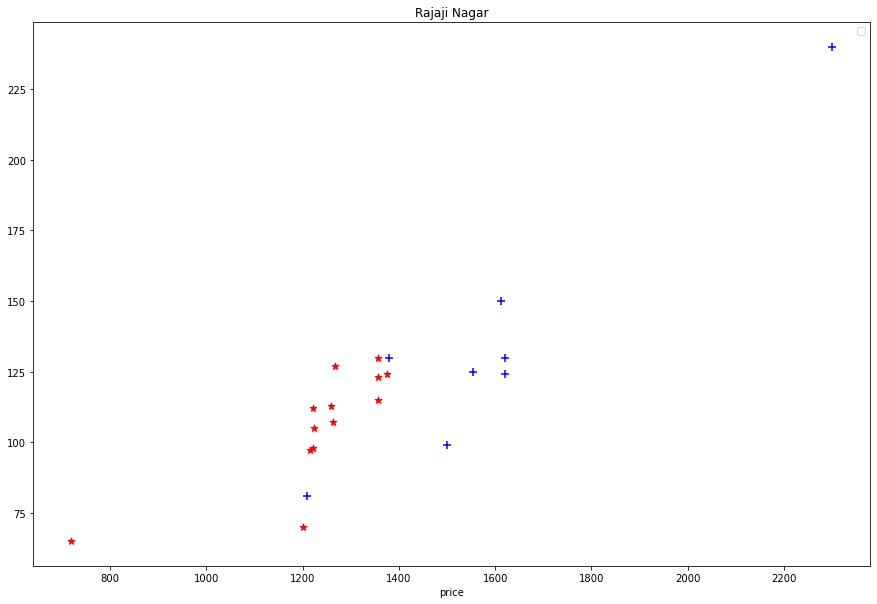

In [133]:
#n1=input('please enter n1 :')
#n2=input('please enter n2 :')
def scatter(df,location):
   # n1=input('please enter n1 :')
   # n2=input('please enter n2 :')
    bhk1 = df[(df.location==location) & (df.bhk==2)]
    bhk2 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk1.total_sqft,bhk1.price, color='red',marker='*', s=50)
    plt.scatter(bhk2.total_sqft,bhk2.price, color='blue',marker='+', s=50)
    plt.xlabel("SQft")
    plt.xlabel("price")    
    plt.title(location)
    plt.legend()   
scatter(df7,'Rajaji Nagar')

In [134]:
def scatter1(df,location):
    bhk1 = df[(df.location==location) & (df.bhk==2)]
    bhk2 = df[(df.location==location) & (df.bhk==3)]
    for df7 in df.total_sqft:
        df7=df6[(bhk2.price<bhk1.price)]
        
        
#scatter1(df7,'Rajaji Nagar') 

In [135]:
df6

,Unnamed: 0,location,size,total_sqft,bath,price,bhk,price per_square_feet
0,0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...,...
13315,13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,13316,others,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [136]:
df6.bath<10

0        True
1        True
2        True
3        True
4        True
         ... 
13315    True
13316    True
13317    True
13318    True
13319    True
Name: bath, Length: 12456, dtype: bool

(array([7.574e+03, 3.162e+03, 1.449e+03, 1.680e+02, 7.800e+01, 1.600e+01,
        2.000e+00, 3.000e+00, 3.000e+00, 1.000e+00]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <BarContainer object of 10 artists>)

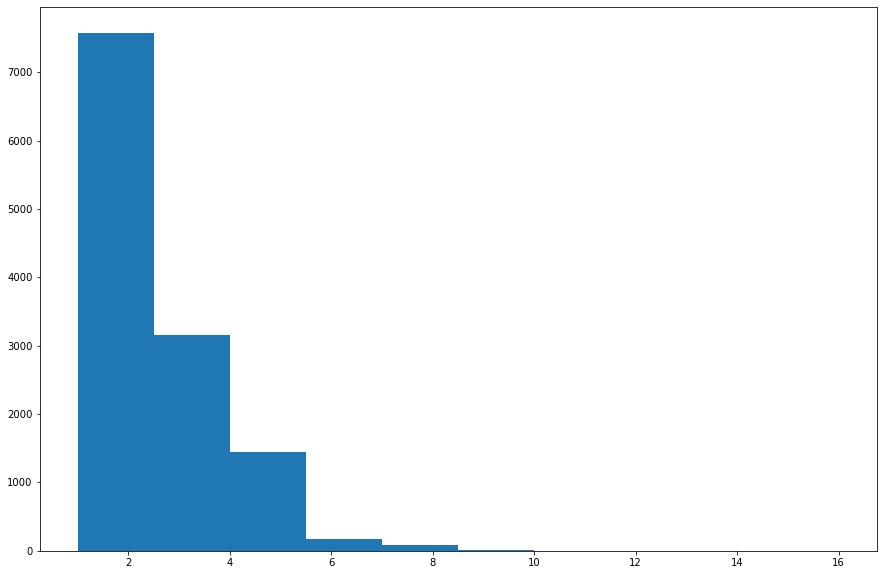

In [137]:
plt.hist(df6.bath)

In [138]:
df6[~(df6.bath<df6.bhk-1)]

,Unnamed: 0,location,size,total_sqft,bath,price,bhk,price per_square_feet
0,0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...,...
13315,13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,13316,others,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [139]:
df7=df6[~(df6.bath<df6.bhk+2)]

In [140]:
df7

,Unnamed: 0,location,size,total_sqft,bath,price,bhk,price per_square_feet
84,84,EPIP Zone,3 BHK,1499.0,5.0,102.0,3,6804.536358
209,209,Padmanabhanagar,4 Bedroom,1736.0,6.0,190.0,4,10944.700461
337,337,Thigalarapalya,4 BHK,3122.0,6.0,230.0,4,7367.072389
490,490,Old Madras Road,5 BHK,4500.0,7.0,337.0,5,7488.888889
524,524,Jakkur,4 BHK,5230.0,6.0,465.0,4,8891.013384
...,...,...,...,...,...,...,...,...
13092,13092,Hebbal,4 BHK,4000.0,6.0,440.0,4,11000.000000
13095,13095,others,4 BHK,6652.0,6.0,660.0,4,9921.828022
13119,13119,others,4 Bedroom,6688.0,6.0,700.0,4,10466.507177
13180,13180,Sarakki Nagar,4 BHK,3124.0,6.0,349.0,4,11171.574904


In [141]:
df7.groupby('price').count()

,Unnamed: 0,location,size,total_sqft,bath,bhk,price per_square_feet
price,,,,,,,
60.0,1,1,1,1,1,1,1
70.0,2,2,2,2,2,2,2
80.0,1,1,1,1,1,1,1
90.0,1,1,1,1,1,1,1
95.0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
1800.0,1,1,1,1,1,1,1
1900.0,1,1,1,1,1,1,1
2600.0,1,1,1,1,1,1,1


In [142]:
df7.location.unique()

array(['EPIP Zone', 'Padmanabhanagar', 'Thigalarapalya',
       'Old Madras Road', 'Jakkur', 'Hebbal', '2nd Stage Nagarbhavi',
       'others', 'Kanakpura Road', 'Binny Pete', 'Singasandra',
       'Sarjapur  Road', 'Kasavanhalli', 'Bannerghatta', 'BTM 2nd Stage',
       'Frazer Town', 'Kodichikkanahalli', 'Whitefield', 'Kogilu',
       'Horamavu Banaswadi', 'Yelahanka', 'Harlur', 'Rajaji Nagar',
       'Kengeri', 'Koramangala', 'Begur Road', 'Hulimavu',
       'Sultan Palaya', 'Malleshwaram', 'Gunjur', 'Banashankari',
       'Seegehalli', 'Arekere', 'Amruthahalli', 'BEML Layout',
       'Vijayanagar', 'Banashankari Stage III', 'Chikkabanavar',
       'Konanakunte', 'Hegde Nagar', 'Sarjapur', 'Benson Town',
       '1st Phase JP Nagar', 'Neeladri Nagar', 'Kalyan nagar',
       'Kaggadasapura', 'Cunningham Road', 'Kammasandra', 'Kudlu Gate',
       'Nagasandra', 'Thanisandra', 'Sarakki Nagar'], dtype=object)

In [143]:
#def scatter1(location):
    bhk1 = df[(df7.location==location) & (df7.bhk==2)]
    bhk2 = df[(df7.location==location) & (df7.bhk==3)]
    for df8 in df7.total_sqft:
        df8=df7[~(bhk2.price<bhk1.price)]
        
        
#scatter1('Rajaji Nagar') 

IndentationError: unexpected indent (3934719777.py, line 2)

In [144]:
df7.head(5)

,Unnamed: 0,location,size,total_sqft,bath,price,bhk,price per_square_feet
84,84,EPIP Zone,3 BHK,1499.0,5.0,102.0,3,6804.536358
209,209,Padmanabhanagar,4 Bedroom,1736.0,6.0,190.0,4,10944.700461
337,337,Thigalarapalya,4 BHK,3122.0,6.0,230.0,4,7367.072389
490,490,Old Madras Road,5 BHK,4500.0,7.0,337.0,5,7488.888889
524,524,Jakkur,4 BHK,5230.0,6.0,465.0,4,8891.013384


In [145]:
df8=df7.drop(['size','price per_square_feet'],axis='columns')

In [146]:
df8


,Unnamed: 0,location,total_sqft,bath,price,bhk
84,84,EPIP Zone,1499.0,5.0,102.0,3
209,209,Padmanabhanagar,1736.0,6.0,190.0,4
337,337,Thigalarapalya,3122.0,6.0,230.0,4
490,490,Old Madras Road,4500.0,7.0,337.0,5
524,524,Jakkur,5230.0,6.0,465.0,4
...,...,...,...,...,...,...
13092,13092,Hebbal,4000.0,6.0,440.0,4
13095,13095,others,6652.0,6.0,660.0,4
13119,13119,others,6688.0,6.0,700.0,4
13180,13180,Sarakki Nagar,3124.0,6.0,349.0,4


In [147]:
dummies = pd.get_dummies(df8.location)
dummies.head(3)

,1st Phase JP Nagar,2nd Stage Nagarbhavi,Amruthahalli,Arekere,BEML Layout,BTM 2nd Stage,Banashankari,Banashankari Stage III,Bannerghatta,Begur Road,...,Sarjapur Road,Seegehalli,Singasandra,Sultan Palaya,Thanisandra,Thigalarapalya,Vijayanagar,Whitefield,Yelahanka,others
84,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
209,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
337,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [148]:
df9 = pd.concat([df8,dummies],axis='columns')
df9.head()

,Unnamed: 0,location,total_sqft,bath,price,bhk,1st Phase JP Nagar,2nd Stage Nagarbhavi,Amruthahalli,Arekere,...,Sarjapur Road,Seegehalli,Singasandra,Sultan Palaya,Thanisandra,Thigalarapalya,Vijayanagar,Whitefield,Yelahanka,others
84,84,EPIP Zone,1499.0,5.0,102.0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
209,209,Padmanabhanagar,1736.0,6.0,190.0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
337,337,Thigalarapalya,3122.0,6.0,230.0,4,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
490,490,Old Madras Road,4500.0,7.0,337.0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
524,524,Jakkur,5230.0,6.0,465.0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [149]:
df10=df9.drop(['location','others'],axis='columns')

In [150]:
df10.head(3)

,Unnamed: 0,total_sqft,bath,price,bhk,1st Phase JP Nagar,2nd Stage Nagarbhavi,Amruthahalli,Arekere,BEML Layout,...,Sarjapur,Sarjapur Road,Seegehalli,Singasandra,Sultan Palaya,Thanisandra,Thigalarapalya,Vijayanagar,Whitefield,Yelahanka
84,84,1499.0,5.0,102.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
209,209,1736.0,6.0,190.0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
337,337,3122.0,6.0,230.0,4,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [151]:
X=df10.drop(['price'],axis='columns')

In [152]:
X.shape

(153, 55)

In [153]:
y=df10.price

In [154]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [155]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

-1.4213751875294802

In [156]:
from sklearn.model_selection import cross_val_score

In [157]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)


cross_val_score(LinearRegression(), X, y, cv=cv)

array([-4.21500923,  0.17847157,  0.30614385,  0.32944887, -3.01812346])

In [158]:
scores1 = cross_val_score(LinearRegression(), X, y, cv=cv)
np.average(scores1)

-1.2838136786984637

# Find best model using GridSearchCV

In [159]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
       
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }        
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\Users\owner\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\owner\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pi

,model,best_score,best_params
0,linear_regression,-1.283814,{'normalize': False}
1,lasso,-0.617175,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,-0.575032,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [160]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]#np.where  It returns an array of lists of indices where the conditions are met
    #loc_index = np.where(X.columns==location,1,loc_index)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
         x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [166]:
price = abs(predict_price('1st Phase JP Nagar',1000, 2, 2))
print(price) 

528.1241309375862


C:\Users\owner\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Export the tested model to a pickle file

In [163]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)